In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
data= pd.read_csv('Spotify_Youtube.csv')
data.head()
data.shape

(20718, 28)

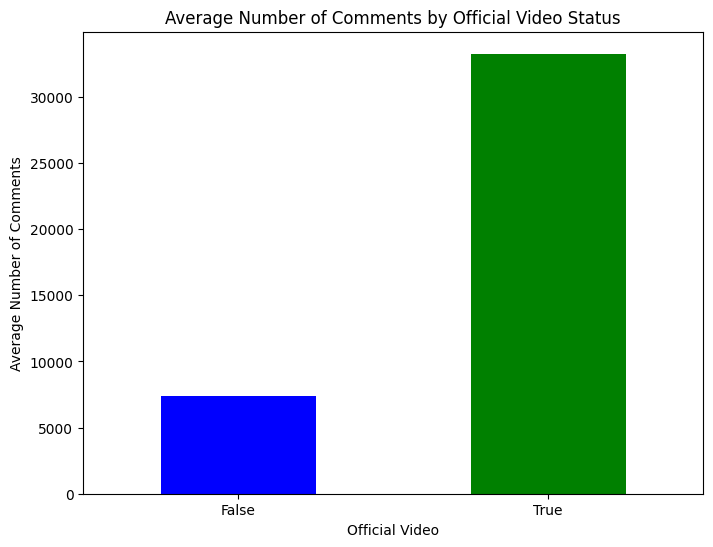

In [8]:
# group by official video status, calculate the mean number of comments
comments_by_official_video = data.groupby('official_video')['Comments'].mean()

# plot data
plt.figure(figsize=(8, 6))
comments_by_official_video.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Number of Comments by Official Video Status')
plt.xlabel('Official Video')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=0)
plt.show()

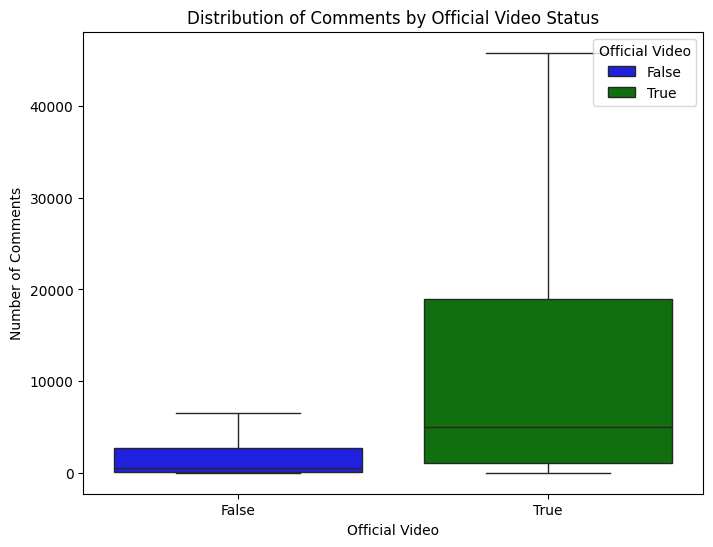

In [11]:
# as a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='official_video', y='Comments', data=data, hue='official_video', palette=['blue', 'green'], showfliers=False)
plt.title('Distribution of Comments by Official Video Status')
plt.xlabel('Official Video')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.legend(title='Official Video', loc='upper right')
plt.show()